# Harry potter House prediction

### All imports

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

### Importing Data

In [503]:
data = pd.read_csv('C:\\Users\\arjun\\Downloads\\dataset_train.csv')
data.head()

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

### Analyzing Data

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

In [505]:
data_mod = data.drop(columns=['Index', 'First Name', 'Last Name'])

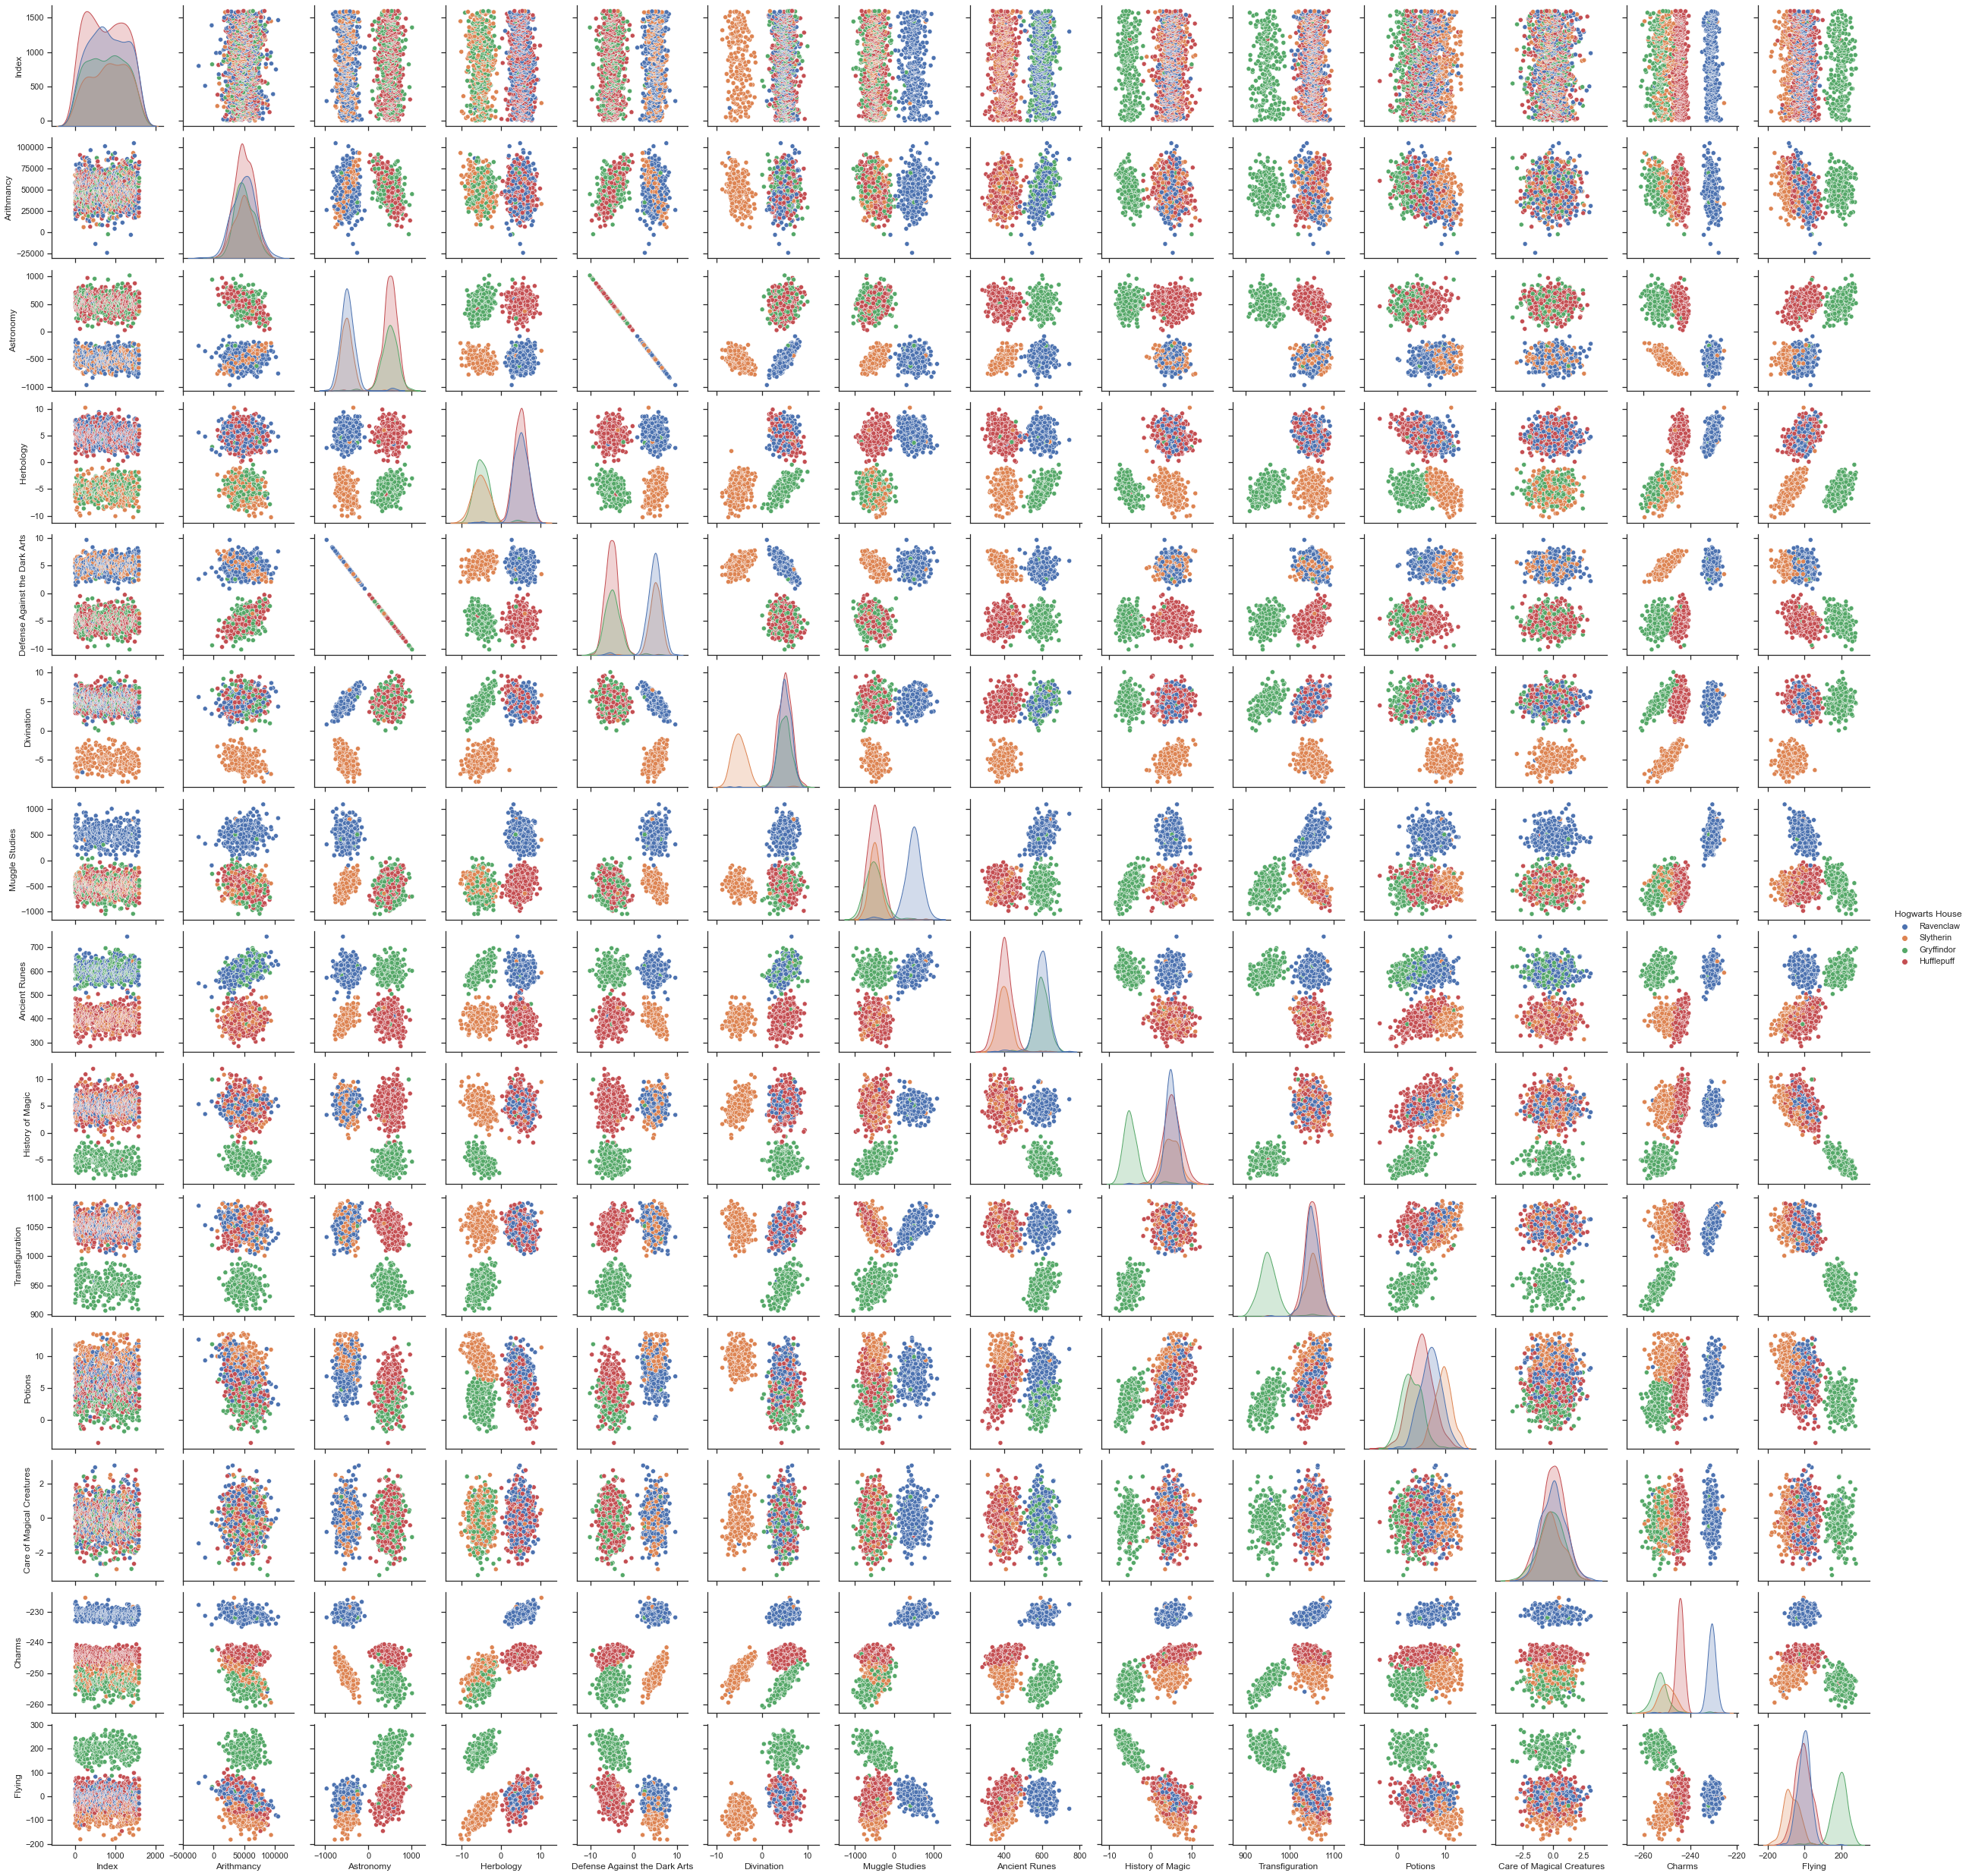

In [498]:
sns.set(style="ticks", color_codes=True)
data = data.dropna()
graph = sns.pairplot(data, hue="Hogwarts House")
graph.savefig('pairplot.png')

In [506]:
data_mod.head()

Hogwarts House    Birthday Best Hand  Arithmancy   Astronomy  Herbology  \
0      Ravenclaw  2000-03-30      Left     58384.0 -487.886086   5.727180   
1      Slytherin  1999-10-14     Right     67239.0 -552.060507  -5.987446   
2      Ravenclaw  1999-11-03      Left     23702.0 -366.076117   7.725017   
3     Gryffindor  2000-08-19      Left     32667.0  697.742809  -6.497214   
4     Gryffindor  1998-09-27      Left     60158.0  436.775204  -7.820623   

   Defense Against the Dark Arts  Divination  Muggle Studies  Ancient Runes  \
0                       4.878861       4.722      272.035831     532.484226   
1                       5.520605      -5.612     -487.340557     367.760303   
2                       3.660761       6.140      664.893521     602.585284   
3                      -6.977428       4.026     -537.001128     523.982133   
4                            NaN       2.236     -444.262537     599.324514   

   History of Magic  Transfiguration   Potions  Care of Magical Creatures  \
0          5.231058      1039.788281  3.790369                   0.715939   
1          4.107170      1058.944592  7.248742                   0.091674   
2          3.555579      1088.088348  8.728531                  -0.515327   
3         -4.809637       920.391449  0.821911                  -0.014040   
4         -3.444377       937.434724  4.311066                  -0.264070   

      Charms  Flying  
0 -232.79405  -26.89  
1 -252.18425 -113.45  
2 -227.34265   30.42  
3 -256.84675  200.64  
4 -256.38730  157.98

### Cleaning the data

In [507]:
data_mod.loc[data_mod['Hogwarts House'] == 'Ravenclaw', 'Hogwarts House'] = 0
data_mod.loc[data_mod['Hogwarts House'] == 'Slytherin', 'Hogwarts House'] = 1
data_mod.loc[data_mod['Hogwarts House'] == 'Gryffindor', 'Hogwarts House'] = 2
data_mod.loc[data_mod['Hogwarts House'] == 'Hufflepuff', 'Hogwarts House'] = 3
data_mod.loc[data_mod['Best Hand'] == 'Left', 'Best Hand'] = 0
data_mod.loc[data_mod['Best Hand'] == 'Right', 'Best Hand'] = 1

In [508]:
data_mod['Birthday'] = pd.to_datetime(data_mod['Birthday'])
data_mod['Birth_day'] = data_mod['Birthday'].dt.day
data_mod['Birth_month'] = data_mod['Birthday'].dt.month
data_mod['Birth_year'] = data_mod['Birthday'].dt.year
data_mod = data_mod.drop(columns=['Birthday'])
data_mod.head()

Hogwarts House Best Hand  Arithmancy   Astronomy  Herbology  \
0              0         0     58384.0 -487.886086   5.727180   
1              1         1     67239.0 -552.060507  -5.987446   
2              0         0     23702.0 -366.076117   7.725017   
3              2         0     32667.0  697.742809  -6.497214   
4              2         0     60158.0  436.775204  -7.820623   

   Defense Against the Dark Arts  Divination  Muggle Studies  Ancient Runes  \
0                       4.878861       4.722      272.035831     532.484226   
1                       5.520605      -5.612     -487.340557     367.760303   
2                       3.660761       6.140      664.893521     602.585284   
3                      -6.977428       4.026     -537.001128     523.982133   
4                            NaN       2.236     -444.262537     599.324514   

   History of Magic  Transfiguration   Potions  Care of Magical Creatures  \
0          5.231058      1039.788281  3.790369                   0.715939   
1          4.107170      1058.944592  7.248742                   0.091674   
2          3.555579      1088.088348  8.728531                  -0.515327   
3         -4.809637       920.391449  0.821911                  -0.014040   
4         -3.444377       937.434724  4.311066                  -0.264070   

      Charms  Flying  Birth_day  Birth_month  Birth_year  
0 -232.79405  -26.89         30            3        2000  
1 -252.18425 -113.45         14           10        1999  
2 -227.34265   30.42          3           11        1999  
3 -256.84675  200.64         19            8        2000  
4 -256.38730  157.98         27            9        1998

In [509]:
data_mod = data_mod.fillna(data_mod.mean())
data_mod.head()
data_mod.shape

(1600, 18)

### Data Visualisation 

<AxesSubplot:>

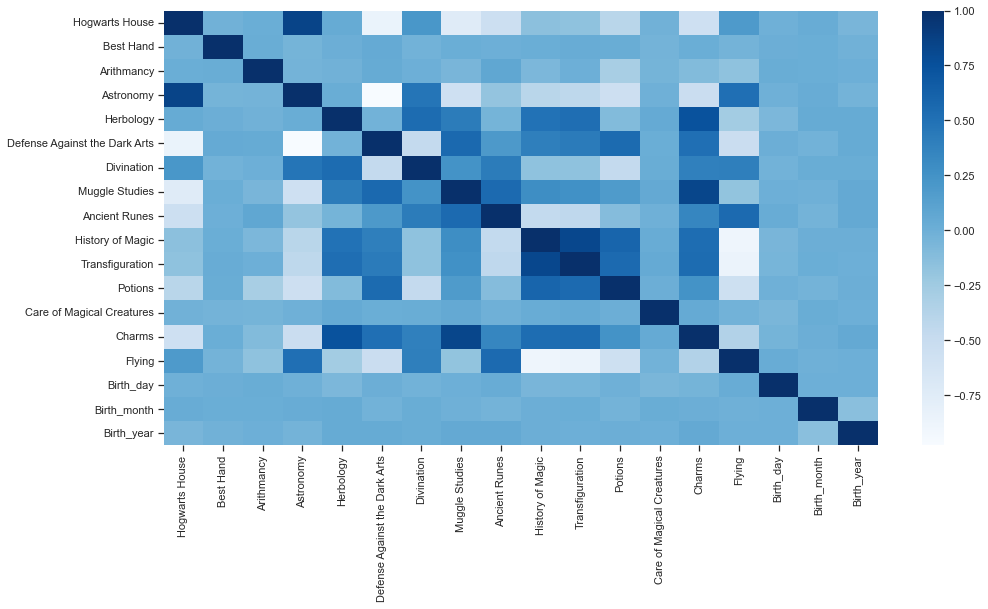

In [510]:
plt.figure(figsize=(16,8))
sns.heatmap(data_mod.corr(), cmap='Blues')

### Training data splitting

In [511]:
y= data_mod['Hogwarts House']
y=y.astype('int')
X = data_mod.drop('Hogwarts House', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling data

In [512]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Using Logistic regression algorithm

In [513]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Predicted values

In [514]:
y_pred=model.predict(X_test)
print(y_test), print(y_pred)

526     2
354     3
168     1
135     0
937     3
       ..
1074    1
1315    3
383     3
1273    2
700     3
Name: Hogwarts House, Length: 320, dtype: int32
[2 3 1 0 3 3 3 0 2 1 3 0 2 0 0 3 3 1 3 2 1 3 1 3 3 1 3 3 3 2 0 2 2 3 1 2 3
 0 3 0 0 3 0 3 0 0 3 3 0 2 0 0 3 0 3 1 2 3 0 0 2 3 3 0 0 2 0 0 2 2 1 2 3 0
 3 0 2 3 2 0 3 3 3 3 0 3 0 3 1 0 2 0 2 2 0 3 1 2 3 0 3 3 3 3 1 1 1 3 0 2 2
 3 3 3 0 0 3 1 3 0 1 0 0 0 0 2 2 0 1 0 1 0 0 2 2 3 3 3 1 1 3 1 0 1 0 1 0 0
 3 2 3 1 0 1 3 0 0 1 2 2 1 0 0 0 1 3 1 0 1 0 1 3 3 0 3 0 3 3 2 3 0 3 0 0 2
 3 2 3 1 0 0 1 2 0 1 3 2 1 2 2 3 3 2 0 1 0 3 3 0 2 0 0 2 3 2 0 0 3 0 0 3 2
 1 3 1 3 1 0 1 0 2 3 2 1 0 1 2 0 0 3 1 3 2 2 3 3 3 3 3 1 3 1 2 3 2 0 2 3 0
 2 0 3 0 2 3 3 1 3 1 2 1 1 3 2 2 0 1 1 3 3 0 3 3 3 2 0 3 2 3 0 1 0 1 2 1 0
 0 1 0 3 3 0 3 2 1 3 0 1 3 2 2 2 0 0 0 1 3 3 2 3]


(None, None)

### Score

In [515]:
model.score(X_test,y_test)

0.9875

In [516]:
model.score(X_train,y_train)

0.98046875

### Confusion matrix 

[[ 94   1   0   1]
 [  0  56   0   0]
 [  0   0  62   0]
 [  0   1   1 104]]


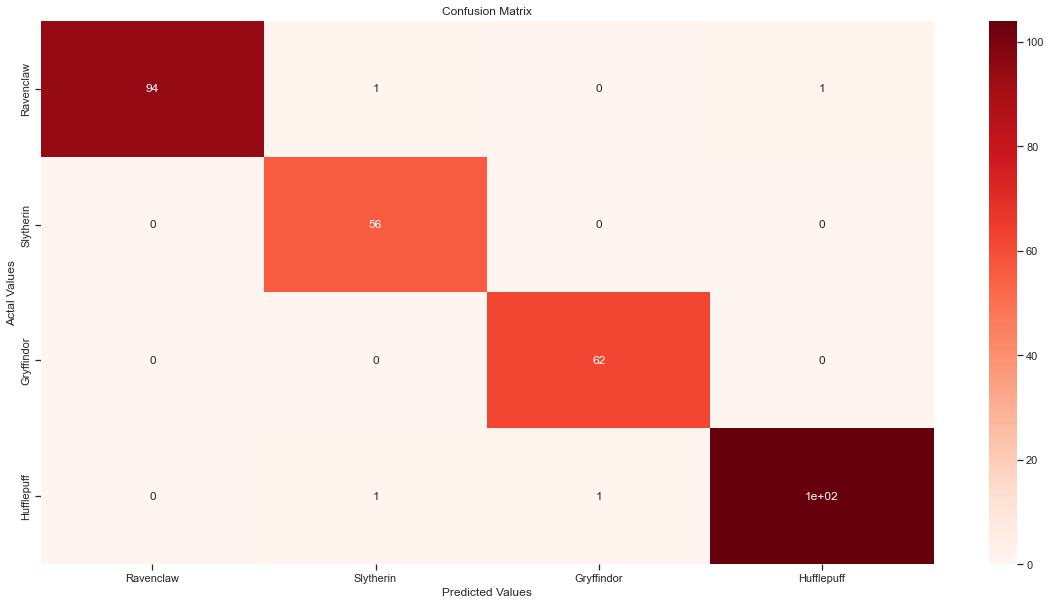

In [517]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['Ravenclaw', 'Slytherin', 'Gryffindor','Hufflepuff'],
                     columns = ['Ravenclaw', 'Slytherin', 'Gryffindor','Hufflepuff'])
#Plotting the confusion matrix
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### MSE

In [518]:
mean_squared_error(y_test, y_pred)              

0.046875

### Saving model

In [486]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))

### Saving output

In [493]:
result = pd.DataFrame({"Hogwarts house":y_test,
"Hogwarts house Predict":y_pred})

In [492]:
result.to_excel("logistic regression output.xlsx", 
              index=False)